In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import os
import os.path as path
import seaborn as sns
import space_fortress_learning_pipeline
import utils_space_fortress
from tqdm import tqdm
sns.reset_orig()

%matplotlib inline
%load_ext autoreload

%autoreload 2
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams["font.size"] = "30"
sns.set(font_scale=2)

In [2]:
DATAPATH = r"D:\Expérience SF 1.0\Résultats"

## engagement

In [93]:
df_engagement = pd.read_excel(path.join(DATAPATH, r"Analyse des scores\EngagementSF.xlsx"), sheetname=1).iloc[:, 1:9]
df_engagement = df_engagement.rename(columns={'# de participant': 'Participant'})
df_engagement.index = df_engagement.Participant.values


df_engagement

# d'essai  Participant  J'étais engagé envers mes objectifs.  \
2           1            2                                     5   
2           2            2                                     5   
2           3            2                                     5   
2           4            2                                     5   
2           5            2                                     5   
2           6            2                                     5   
2           7            2                                     5   
2           8            2                                     5   
2           9            2                                     5   
2          10            2                                     5   
2          11            2                                     5   
2          12            2                                     5   
2          13            2                                     5   
2          14            2                                     5   
2          15            2                                     5   
2          16            2                                     5   
2          17            2                                     5   
2          18            2                                     5   
2          19            2                                     5   
2          20            2                                     5   
2          21            2                                     5   
2          22            2                                     5   
2          23            2                                     5   
2          24            2                                     5   
3           1            3                                     4   
3           2            3                                     5   
3           3            3                                     5   
3           4            3                                     5   
3           5            3                                     5   
3           6            3                                     4   
..        ...          ...                                   ...   
45         19           45                                     4   
45         20           45                                     4   
45         21           45                                     4   
45         22           45                                     4   
45         23           45                                     4   
45         24           45                                     4   
46          1           46                                     4   
46          2           46                                     4   
46          3           46                                     4   
46          4           46                                     4   
46          5           46                                     4   
46          6           46                                     4   
46          7           46                                     4   
46          8           46                                     4   
46          9           46                                     4   
46         10           46                                     4   
46         11           46                                     4   
46         12           46                                     4   
46         13           46                                     4   
46         14           46                                     4   
46         15           46                                     4   
46         16           46                                     4   
46         17           46                                     4   
46         18           46                                     4   
46         19           46                                     4   
46         20           46                                     4   
46         21           46                                  

### binarizer

In [94]:
df_medians = df_engagement.groupby('Participant').median()
df_medians

# d'essai  J'étais engagé envers mes objectifs.  \
Participant                                                    
2                 12.5                                   5.0   
3                 12.5                                   5.0   
4                 12.5                                   5.0   
5                 12.5                                   4.0   
6                 12.5                                   5.0   
7                 12.5                                   5.0   
8                 12.5                                   5.0   
9                 12.5                                   5.0   
10                12.5                                   4.0   
11                12.5                                   5.0   
12                12.5                                   4.0   
13                12.5                                   5.0   
14                12.5                                   4.0   
15                12.5                                   4.0   
16                12.5                                   5.0   
17                12.5                                   4.0   
18                12.5                                   5.0   
19                12.5                                   2.0   
20                12.5                                   5.0   
21                12.5                                   3.5   
22                12.5                                   4.0   
23                12.5                                   5.0   
26                12.5                                   1.0   
27                12.5                                   4.0   
28                12.5                                   5.0   
29                12.5                                   3.5   
33                12.5                                   5.0   
34                12.5                                   5.0   
35                12.5                                   3.0   
36                12.0                                   4.0   
38                12.5                                   3.0   
39                12.0                                   4.0   
40                12.5                                   5.0   
43                12.5                                   4.0   
44                 6.5                                   5.0   
45                12.5                                   4.0   
46                12.5                                   4.0   

             Je me suis soucié d'atteindre mes objectifs  \
Participant                                                
2                                                    5.0   
3                                                    5.0   
4                                                    5.0   
5                                                    4.0   
6                                                    5.0   
7                                                    5.0   
8                                                    5.0   
9                                                    5.0   
10                                                   4.0   
11                                                   5.0   
12                                                   4.0   
13                                                   5.0   
14                                                   4.0   
15                                                   4.0   
16                                                   5.0   
17                                                   4.0   
18                                                   5.0   
19                                                   2.0   
20                                                   5.0   
21                                                   4.0   
22                                                   4.0   
23                                                   5.0   
26                                                   2.0   
27              

In [95]:
def binarize(se):
    par = se.Participant
    se = se.drop('Participant')
    median = df_medians.loc[par]
    bins = se>median
    bins.index = 'above_median_' + bins.index
    return bins

df_engagement = pd.concat([df_engagement, df_engagement.apply(binarize, axis=1)], axis=1, ignore_index=False)
df_engagement

# d'essai  Participant  J'étais engagé envers mes objectifs.  \
2           1            2                                     5   
2           2            2                                     5   
2           3            2                                     5   
2           4            2                                     5   
2           5            2                                     5   
2           6            2                                     5   
2           7            2                                     5   
2           8            2                                     5   
2           9            2                                     5   
2          10            2                                     5   
2          11            2                                     5   
2          12            2                                     5   
2          13            2                                     5   
2          14            2                                     5   
2          15            2                                     5   
2          16            2                                     5   
2          17            2                                     5   
2          18            2                                     5   
2          19            2                                     5   
2          20            2                                     5   
2          21            2                                     5   
2          22            2                                     5   
2          23            2                                     5   
2          24            2                                     5   
3           1            3                                     4   
3           2            3                                     5   
3           3            3                                     5   
3           4            3                                     5   
3           5            3                                     5   
3           6            3                                     4   
..        ...          ...                                   ...   
45         19           45                                     4   
45         20           45                                     4   
45         21           45                                     4   
45         22           45                                     4   
45         23           45                                     4   
45         24           45                                     4   
46          1           46                                     4   
46          2           46                                     4   
46          3           46                                     4   
46          4           46                                     4   
46          5           46                                     4   
46          6           46                                     4   
46          7           46                                     4   
46          8           46                                     4   
46          9           46                                     4   
46         10           46                                     4   
46         11           46                                     4   
46         12           46                                     4   
46         13           46                                     4   
46         14           46                                     4   
46         15           46                                     4   
46         16           46                                     4   
46         17           46                                     4   
46         18           46                                     4   
46         19           46                                     4   
46         20           46                                     4   
46         21           46                                  

## signaux physio

In [96]:
df_cases = pd.read_csv(path.join(DATAPATH, "Analyses Originales", "AllofDataSFCompletecases.csv"),skipinitialspace=True).drop('Unnamed: 0', axis=1)
df_cases = df_cases.rename(columns={'sujet': 'participant'})
df_cases.participant = df_cases.participant.apply(lambda x : int(x.replace('Sujet ', ''))).astype(int)
df_cases = df_cases.sort_values(['participant', 'Session'], axis=0)
df_cases.index = df_cases.apply(lambda x : "par{},sess{}".format(x['participant'], x['Session']), axis=1)
df_cases['id'] = np.arange(len(df_cases))


df_cases

participant  Session  LongWindowPowerBands_HFPowerBand  \
par2,sess1              2        1                        239.434500   
par2,sess2              2        2                        164.686740   
par2,sess3              2        3                        187.466111   
par2,sess4              2        4                        150.123652   
par2,sess5              2        5                        192.152833   
par2,sess6              2        6                        223.559389   
par2,sess7              2        7                        217.487500   
par2,sess8              2        8                        153.147088   
par2,sess9              2        9                        155.144835   
par2,sess10             2       10                        167.626389   
par2,sess11             2       11                        162.430391   
par2,sess12             2       12                        205.736500   
par2,sess13             2       13                        512.296575   
par2,sess14             2       14                        232.188889   
par2,sess15             2       15                        178.338556   
par2,sess16             2       16                        277.562222   
par2,sess17             2       17                        302.404190   
par2,sess18             2       18                        368.351732   
par2,sess19             2       19                        175.104286   
par2,sess20             2       20                        457.002056   
par2,sess21             2       21                        528.500112   
par2,sess22             2       22                       1132.022431   
par2,sess23             2       23                        271.497542   
par2,sess24             2       24                        857.182333   
par3,sess1              3        1                         80.166413   
par3,sess2              3        2                         95.238836   
par3,sess3              3        3                        112.098138   
par3,sess4              3        4                        159.947701   
par3,sess5              3        5                        106.911989   
par3,sess6              3        6                         77.301632   
...                   ...      ...                               ...   
par39,sess6            39        6                       1684.268989   
par39,sess7            39        7                       1713.612667   
par39,sess8            39        8                       4784.181620   
par39,sess9            39        9                       6444.141000   
par39,sess10           39       10                      11801.732079   
par39,sess11           39       11                       7438.667697   
par45,sess1            45        1                        742.543167   
par45,sess2            45        2                       1099.490503   
par45,sess3            45        3                        740.186740   
par45,sess4            45        4                       1592.749556   
par45,sess5            45        5                        849.351685   
par45,sess6            45        6                        685.643187   
par45,sess7            45        7                        602.180278   
par45,sess8            45        8                        396.738389   
par45,sess9            45        9                        325.787348   
par45,sess10           45       10                        910.016425   
par45,sess11           45       11                        851.408111   
par45,sess12           45       12                        305.827596   
par45,sess13           45       13                        512.843536   
par45,sess14           45       14                        123.799330   
par45,sess15           45       15                         82.446313   
par45,sess16           45       16                         91.599779   
par45,sess17           45       17                        118.743923   
par45,sess18           45       18                    

In [97]:
physio_columns = df_cases.columns[2:59]
physio_columns = physio_columns.drop('BatteryVoltageInVolt')
df_cases[physio_columns]

LongWindowPowerBands_HFPowerBand  \
par2,sess1                          239.434500   
par2,sess2                          164.686740   
par2,sess3                          187.466111   
par2,sess4                          150.123652   
par2,sess5                          192.152833   
par2,sess6                          223.559389   
par2,sess7                          217.487500   
par2,sess8                          153.147088   
par2,sess9                          155.144835   
par2,sess10                         167.626389   
par2,sess11                         162.430391   
par2,sess12                         205.736500   
par2,sess13                         512.296575   
par2,sess14                         232.188889   
par2,sess15                         178.338556   
par2,sess16                         277.562222   
par2,sess17                         302.404190   
par2,sess18                         368.351732   
par2,sess19                         175.104286   
par2,sess20                         457.002056   
par2,sess21                         528.500112   
par2,sess22                        1132.022431   
par2,sess23                         271.497542   
par2,sess24                         857.182333   
par3,sess1                           80.166413   
par3,sess2                           95.238836   
par3,sess3                          112.098138   
par3,sess4                          159.947701   
par3,sess5                          106.911989   
par3,sess6                           77.301632   
...                                        ...   
par39,sess6                        1684.268989   
par39,sess7                        1713.612667   
par39,sess8                        4784.181620   
par39,sess9                        6444.141000   
par39,sess10                      11801.732079   
par39,sess11                       7438.667697   
par45,sess1                         742.543167   
par45,sess2                        1099.490503   
par45,sess3                         740.186740   
par45,sess4                        1592.749556   
par45,sess5                         849.351685   
par45,sess6                         685.643187   
par45,sess7                         602.180278   
par45,sess8                         396.738389   
par45,sess9                         325.787348   
par45,sess10                        910.016425   
par45,sess11                        851.408111   
par45,sess12                        305.827596   
par45,sess13                        512.843536   
par45,sess14                        123.799330   
par45,sess15                         82.446313   
par45,sess16                         91.599779   
par45,sess17                        118.743923   
par45,sess18                        505.583094   
par45,sess19                        612.842626   
par45,sess20                        939.253149   
par45,sess21                        958.077238   
par45,sess22                       2230.889611   
par45,sess23                       1991.833315   
par45,sess24                       4327.998297   

              LongWindowPowerBands_HRVPowerBand  \
par2,sess1                          1667.596667   
par2,sess2                          1067.373039   
par2,sess3                          1781.386889   
par2,sess4                           801.331180   
par2,sess5                          1611.085333   
par2,sess6                          1528.128556   
par2,sess7                          1681.455778   
par2,sess8                          1057.440275   
par2,sess9                          1501.761264   
par2,sess10                         1006.731167   
par2,sess11                         1347.540391   
par2,sess12                         1345.525778   
par2,sess13                         2073.874917   
par2,sess14                         1823.362000   
par2,sess15                         1161.832611   
par2,sess16                         1445.733333   
par2,sess17                         1907.47536

## Match bio to engagement

In [99]:
def match_engagement(se):
    return df_engagement[(se[['participant', 'Session']].values == df_engagement[['Participant', "# d'essai"]].values).all(axis=1)].iloc[0, :]

se = df_cases.iloc[0,:]
df_cases_with_engagement = pd.concat([df_cases, df_cases.apply(match_engagement, axis=1)], axis=1, ignore_index=False)\
                            .drop(['Session', 'Participant', "# d'essai", "above_median_# d'essai"], axis=1)
df_cases_with_engagement

participant  LongWindowPowerBands_HFPowerBand  \
par2,sess1              2                        239.434500   
par2,sess2              2                        164.686740   
par2,sess3              2                        187.466111   
par2,sess4              2                        150.123652   
par2,sess5              2                        192.152833   
par2,sess6              2                        223.559389   
par2,sess7              2                        217.487500   
par2,sess8              2                        153.147088   
par2,sess9              2                        155.144835   
par2,sess10             2                        167.626389   
par2,sess11             2                        162.430391   
par2,sess12             2                        205.736500   
par2,sess13             2                        512.296575   
par2,sess14             2                        232.188889   
par2,sess15             2                        178.338556   
par2,sess16             2                        277.562222   
par2,sess17             2                        302.404190   
par2,sess18             2                        368.351732   
par2,sess19             2                        175.104286   
par2,sess20             2                        457.002056   
par2,sess21             2                        528.500112   
par2,sess22             2                       1132.022431   
par2,sess23             2                        271.497542   
par2,sess24             2                        857.182333   
par3,sess1              3                         80.166413   
par3,sess2              3                         95.238836   
par3,sess3              3                        112.098138   
par3,sess4              3                        159.947701   
par3,sess5              3                        106.911989   
par3,sess6              3                         77.301632   
...                   ...                               ...   
par39,sess6            39                       1684.268989   
par39,sess7            39                       1713.612667   
par39,sess8            39                       4784.181620   
par39,sess9            39                       6444.141000   
par39,sess10           39                      11801.732079   
par39,sess11           39                       7438.667697   
par45,sess1            45                        742.543167   
par45,sess2            45                       1099.490503   
par45,sess3            45                        740.186740   
par45,sess4            45                       1592.749556   
par45,sess5            45                        849.351685   
par45,sess6            45                        685.643187   
par45,sess7            45                        602.180278   
par45,sess8            45                        396.738389   
par45,sess9            45                        325.787348   
par45,sess10           45                        910.016425   
par45,sess11           45                        851.408111   
par45,sess12           45                        305.827596   
par45,sess13           45                        512.843536   
par45,sess14           45                        123.799330   
par45,sess15           45                         82.446313   
par45,sess16           45                         91.599779   
par45,sess17           45                        118.743923   
par45,sess18           45                        505.583094   
par45,sess19           45                        612.842626   
par45,sess20           45                        939.253149   
par45,sess21           45                        958.077238   
par45,sess22           45                       2230.889611   
par45,sess23           45                       1991.833315   
par45,sess24           45                       4327.998297   

              LongWindowPowerBands_HRVPowerBand  \
par2,sess1                          1667.596667   
par2,

# Charge mentale

In [100]:
df_cases_with_engagement['Charge mentale'] = df_cases_with_engagement["J'étais surchargé par cette tâche."] - \
                                                df_cases_with_engagement["J'étais sous stimulé par cette tâche."]
df_cases_with_engagement

participant  LongWindowPowerBands_HFPowerBand  \
par2,sess1              2                        239.434500   
par2,sess2              2                        164.686740   
par2,sess3              2                        187.466111   
par2,sess4              2                        150.123652   
par2,sess5              2                        192.152833   
par2,sess6              2                        223.559389   
par2,sess7              2                        217.487500   
par2,sess8              2                        153.147088   
par2,sess9              2                        155.144835   
par2,sess10             2                        167.626389   
par2,sess11             2                        162.430391   
par2,sess12             2                        205.736500   
par2,sess13             2                        512.296575   
par2,sess14             2                        232.188889   
par2,sess15             2                        178.338556   
par2,sess16             2                        277.562222   
par2,sess17             2                        302.404190   
par2,sess18             2                        368.351732   
par2,sess19             2                        175.104286   
par2,sess20             2                        457.002056   
par2,sess21             2                        528.500112   
par2,sess22             2                       1132.022431   
par2,sess23             2                        271.497542   
par2,sess24             2                        857.182333   
par3,sess1              3                         80.166413   
par3,sess2              3                         95.238836   
par3,sess3              3                        112.098138   
par3,sess4              3                        159.947701   
par3,sess5              3                        106.911989   
par3,sess6              3                         77.301632   
...                   ...                               ...   
par39,sess6            39                       1684.268989   
par39,sess7            39                       1713.612667   
par39,sess8            39                       4784.181620   
par39,sess9            39                       6444.141000   
par39,sess10           39                      11801.732079   
par39,sess11           39                       7438.667697   
par45,sess1            45                        742.543167   
par45,sess2            45                       1099.490503   
par45,sess3            45                        740.186740   
par45,sess4            45                       1592.749556   
par45,sess5            45                        849.351685   
par45,sess6            45                        685.643187   
par45,sess7            45                        602.180278   
par45,sess8            45                        396.738389   
par45,sess9            45                        325.787348   
par45,sess10           45                        910.016425   
par45,sess11           45                        851.408111   
par45,sess12           45                        305.827596   
par45,sess13           45                        512.843536   
par45,sess14           45                        123.799330   
par45,sess15           45                         82.446313   
par45,sess16           45                         91.599779   
par45,sess17           45                        118.743923   
par45,sess18           45                        505.583094   
par45,sess19           45                        612.842626   
par45,sess20           45                        939.253149   
par45,sess21           45                        958.077238   
par45,sess22           45                       2230.889611   
par45,sess23           45                       1991.833315   
par45,sess24           45                       4327.998297   

              LongWindowPowerBands_HRVPowerBand  \
par2,sess1                          1667.596667   
par2,

# Machine learning

In [101]:
df_valid = df_cases_with_engagement.dropna()

participants = list(set(df_valid.participant))
groups = df_valid.participant

## regression

In [102]:
Y = df_valid["J'étais surchargé par cette tâche."].astype(np.float32).as_matrix()
X_columns = physio_columns
X = df_valid[X_columns].astype(np.float32).as_matrix()

X.shape, Y.shape

((424, 56), (424,))

In [103]:
from tsfresh.feature_selection.selection import select_features

X_selected = select_features(pd.DataFrame(X), Y, ml_task='regression',)
X_selected.columns = df_valid[X_columns].columns[X_selected.columns]
print("{} signals selected from a total of {}".format(len(X_selected.columns), X.shape[1]))
print(X_selected.columns)

13 signals selected from a total of 56
Index(['InvoluntaryFixationRatioShortWindow',
       'InvoluntaryFixationRatioLongWindow',
       'LongWindowPowerBands_LFHFPowerBand',
       'ShortWindowPowerBands_LFHFPowerBand', 'FixationRatioStandardDeviation',
       'VerticalPeakAccelerationInG', 'PupilSizeStandardDeviationInPixel',
       'SaccadeRatioLongWindow', 'PupilDilatationStandardDeviationInPixel',
       'SaccadeRatioShortWindow', 'PeakAccelerationInG',
       'VerticalMinimumAccelerationInG', 'ActivityInVmu'],
      dtype='object')


## train test split

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold, GroupShuffleSplit

cv_all = GroupShuffleSplit(n_splits=1)

train_all, test_all = next(cv_all.split(X, Y, groups=groups))
X_train = X[train_all]
X_test  = X[test_all]

Y_train = Y[train_all]
Y_test  = Y[test_all]

### scaler

In [105]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

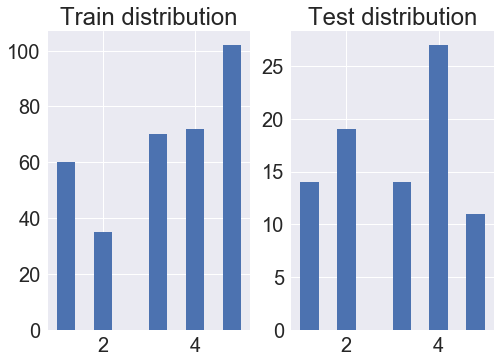

In [106]:
plt.subplot(1, 2, 1)
plt.hist(Y_train, )
plt.title('Train distribution')
plt.subplot(1, 2, 2)
plt.hist(Y_test,)
plt.title('Test distribution')
plt.show()


## Model training

In [107]:
train_groups = df_valid.participant.iloc[train_all]
group_kfold = GroupShuffleSplit(n_splits=10)

### models

In [108]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, make_scorer
def print_regression_score(y_true, y_pred):
    print("mean squared error : {:.3f}".format(mean_squared_error(y_true, y_pred)))
    print("explained variance : {:.3f}".format(explained_variance_score(y_true, y_pred)))
    print("r2 score           : {:.3f}".format(r2_score(y_true, y_pred)))
    

In [109]:
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNetCV, LinearRegression, RANSACRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor

reg_classifiers = [DummyRegressor(), 
               GradientBoostingRegressor(), 
               RandomForestRegressor(), 
               GaussianProcessRegressor(),
               ElasticNetCV(),
               LinearRegression(),
               SVR(),
               LinearSVR(),
               KNeighborsRegressor()]

for sk_class in reg_classifiers:
    print(sk_class)
    sk_class.fit(X_train, Y_train)
    Y_pred = sk_class.predict(X_test)
    print_regression_score(Y_test, Y_pred)
    print()
    
    

DummyRegressor(constant=None, quantile=None, strategy='mean')
mean squared error : 1.828
explained variance : -0.000
r2 score           : -0.065

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
mean squared error : 2.975
explained variance : -0.553
r2 score           : -0.733

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, wa

C:\Users\AlexisFCote\Anaconda3\envs\SpaceFortress\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


mean squared error : 2.554
explained variance : -0.465
r2 score           : -0.488

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
mean squared error : 12.848
explained variance : -6.031
r2 score           : -6.482

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
mean squared error : 2.544
explained variance : -0.340
r2 score           : -0.481

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)
mean squared error : 8.446
explained variance : -3.892
r2 score           : -3.919

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
mean squared error : 3.034
explained variance : -0.648
r2 score           : -0.767



## classification

In [110]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clas_classifiers = [DummyClassifier(), 
               GradientBoostingClassifier(), 
               RandomForestClassifier(), 
               GaussianProcessClassifier(),
               SVC(),
               LinearSVC(),
               KNeighborsClassifier()]

## Performance de chaque label : regression et classification

In [119]:
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score

X = df_valid[X_columns].astype(np.float32).as_matrix()
## Add a fake signal strongly correlated to 'Charge mentale'
#X = np.concatenate((X, np.reshape(df_valid['Charge mentale'].astype(np.float32).as_matrix(), (X.shape[0], 1))), axis=1)

df_results = pd.DataFrame()
for target in tqdm([x for x in list(df_engagement) + ['Charge mentale'] if x in df_valid.columns]):
    target_result = dict()
    Y = df_valid[target].astype(np.float32).as_matrix()
    if 'median' in target: # classification
        classifiers = clas_classifiers
        scoring = make_scorer(accuracy_score)
    else: # regression
        classifiers = reg_classifiers
        scoring = make_scorer(explained_variance_score)
    for sk_class in classifiers:
        classifier_name = sk_class.__repr__().split('(')[0][:5]
        sk_class = Pipeline([('scaler', RobustScaler()),('classifier', sk_class)])
        res = cross_val_score(sk_class, X, Y, groups=groups, scoring=scoring, cv=LeaveOneGroupOut(), n_jobs=-1)
        target_result[classifier_name] = np.mean(res)
    se = pd.Series(target_result, name=target)
    df_results[target]=se


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [02:53<00:00, 12.02s/it]


In [ ]:
df_results.clip(0, 1).style.bar(color='#5fba7d')